# Importing Dependencies

In [461]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [403]:
train_data = pd.read_csv('/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt', sep=' ::: ', engine='python', header = None, names =  ['title','genre','description'])
test_data = pd.read_csv('/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt', sep=' ::: ', engine='python', header=None, names =  ['title','genre','description'])
test_data_solution = pd.read_csv('/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt', sep=' ::: ', engine='python', header=None, names =  ['title','genre','description'])

In [108]:
train_data.shape

(54214, 3)

In [109]:
test_data.head()

,title,genre,description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
5,Er nu zhai (1955),drama,Before he was known internationally as a marti...


# Visualisation of the Classes

Text(0, 0.5, 'Count')

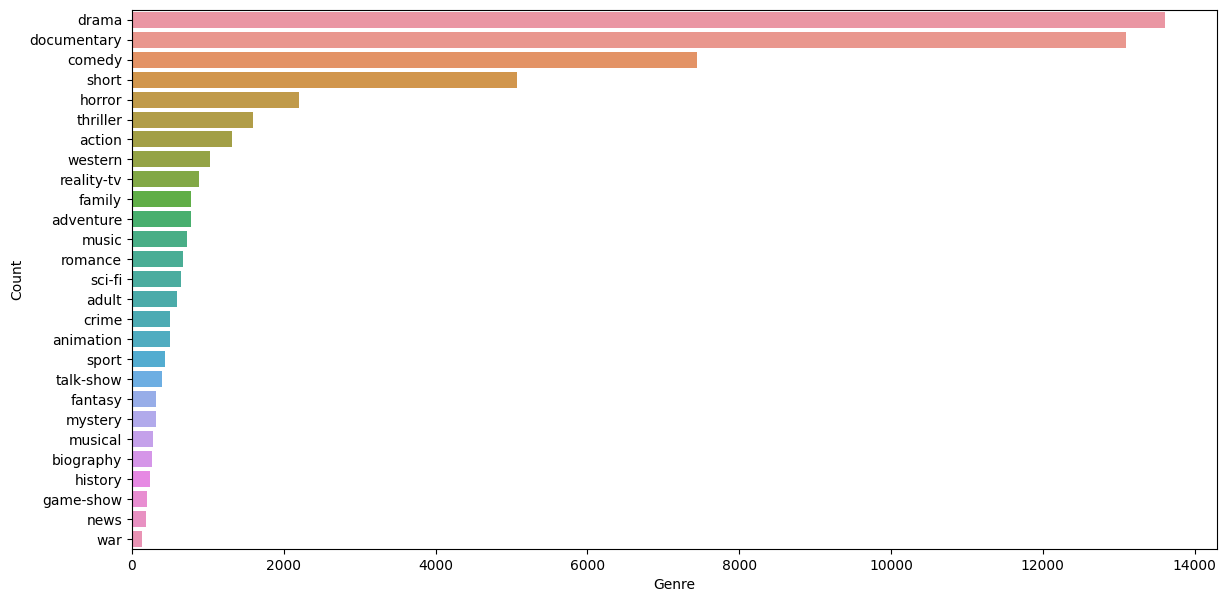

In [404]:
plt.figure(figsize=(14,7)) 
counts = train_data.genre.value_counts() 
sns.barplot(x=counts, y=counts.index, orient='h') 
plt.xlabel('Genre') 
plt.ylabel('Count')

In [129]:
train_data.sample(10)

,title,genre,description
11269,The 3 Phases of Eve (1972),adult,Eve has a problem: she believes she has three ...
12764,Muffin's Coffins (????),animation,Norbert always seemed to be that guy who drew ...
11783,Rubdown (1993),thriller,"A rich man offers his masseur, a former baseba..."
8762,Minky Momo: The Fairy Princess of Dreamland (2...,animation,"Minky Momo, a princess from a magical world is..."
15957,AGO Galleria Italia (2007),biography,"When art meets architecture, powerful experien..."
16898,"""3 Chefs 1 City"" (2015)",adventure,"3 Chefs, 1 City is a sexy and stylish televisi..."
5759,Thalai Nagaram (2006),family,Thalainagaram dwells on a gang of kind-hearted...
7344,Dangerous Situations (2005),adult,Two snoopy young women decide to play amateur ...
16121,The Wild Westerners (1962),western,Sheriff Plummer and his men are using their ba...
9509,ANGELS (????),history,Based on actual events: Paradise turns to fier...


# Data Preparation

In [405]:
train_data['feature'] = train_data['title'] + ' ' + train_data['description']
test_data['feature'] = test_data[['title', 'description']].agg(' '.join, axis = 1)

In [273]:
train_data['genre'].nunique()

27

In [132]:
train_data.sample(10)

,title,genre,description,feature
10847,"""Psychology of Murder"" (2015)",thriller,"Detective Aiden Wolf; A extremely intelligent,...","""Psychology of Murder"" (2015) Detective Aiden ..."
8901,Alone in the Wild: Aron Ralston (2011),adventure,Aron Ralston is arguably the most famous survi...,Alone in the Wild: Aron Ralston (2011) Aron Ra...
2612,"Silna, kak smert, lyubov (1997)",drama,After e few years in the west writer Alexei de...,"Silna, kak smert, lyubov (1997) After e few ye..."
11840,Hitched (2001),thriller,Salesman Ted Robbins is reported missing by hi...,Hitched (2001) Salesman Ted Robbins is reporte...
17008,Heroes (1984),adult,Class assignment: Write a 500-word essay on yo...,Heroes (1984) Class assignment: Write a 500-wo...
14635,Everything Is Allowed (2004),adult,The basic plot is that a guy is having problem...,Everything Is Allowed (2004) The basic plot is...
4919,Vypusk '97 (2017),short,Roman lives a lonely life in a provincial city...,Vypusk '97 (2017) Roman lives a lonely life in...
8480,The Giant Under the Snow (????),fantasy,"One Christmas, three children find an old reli...","The Giant Under the Snow (????) One Christmas,..."
8182,The Flame Barrier (1958),sci-fi,Carol Dahlmann enlists the Hollister brothers ...,The Flame Barrier (1958) Carol Dahlmann enlist...
5049,"""America's Next Top Baseball Player"" (????)",reality-tv,Four former major league baseball players scou...,"""America's Next Top Baseball Player"" (????) Fo..."


In [6]:
test_data['feature']

1        Edgar's Lunch (1998) L.R. Brane loves his life...
2        La guerra de papá (1977) Spain, March 1964: Qu...
3        Off the Beaten Track (2010) One year in the li...
4        Meu Amigo Hindu (2015) His father has died, he...
5        Er nu zhai (1955) Before he was known internat...
                               ...                        
54196    "Tales of Light & Dark" (2013) Covering multip...
54197    Der letzte Mohikaner (1965) As Alice and Cora ...
54198    Oliver Twink (2007) A movie 169 years in the m...
54199    Slipstream (1973) Popular, but mysterious rock...
54200    Curitiba Zero Grau (2010) Curitiba is a city i...
Name: feature, Length: 54200, dtype: object

In [176]:
# Randomly sample 5 rows from the 'feature' column (which combines title and description)
train_data['feature'].sample(5)

49237    mantaranehpanzdahsaldaramfifteenyearoldtaraneh...
22148    eldedointhetraditionofobrotherwhereartthouandt...
3363     tillykkefrederikmarylivetransmissionsfromoctob...
23276    borderlinethepeoplevseunicebakeradocumentaryth...
7992     theinvisibleplayerprofessornarianeminentuniver...
Name: feature, dtype: object

In [177]:
# Randomly sample 5 rows from the 'feature' column for test dataset (which combines title and description)
test_data['feature'].sample(5)

7728     thejungleprincesslifethreateningadventuresinth...
7075     riseupthelegacyofnatturnerthedocumentarywillgi...
11150    highwayfarfromtelavivandbigcitycrimesdafnatill...
15937    mumbaipunemumbaimarriagepreparationsareinfulls...
20873    daughtersofclubbilitisaglimpseatthelivesofagro...
Name: feature, dtype: object

# TF-IDF Vectorization of Text Features



TF-IDF stands for Term Frequency-Inverse Document Frequency. It's a technique used to convert text data into numerical features. TF-IDF takes into account:

Term Frequency (TF): How often a word appears in a document.
Inverse Document Frequency (IDF): How rare a word is across the entire corpus.
Since the machine won't be able to understand text data, we need to convert them into numerical features

In [425]:
# Initialize TF-IDF Vectorizer with English stop words removal

vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 5000)
x_train = vectorizer.fit_transform(train_data['feature'])
x_test = vectorizer.transform(test_data['feature'])


In [299]:
x_train.shape

(54214, 5000)

In [459]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

train_data['genre_encoded'] = label_encoder.fit_transform(train_data['genre'])
test_data['genre_encoded'] = label_encoder.transform(test_data['genre'])

# Assign encoded labels as target variables for model training
y_train = train_data['genre_encoded']
y_test = test_data['genre_encoded']

# Train a Naive Bayes Classifier


A probabilistic classification algorithm based on Bayes’ Theorem, which assumes that the features are conditionally independent of each other given the class label.

Efficient for hight-dimensional data (ex: text classification).

MultinomialNB: Multinomial Naive Bayes - Classifier Implements Multinomial Naive Bayes Algorithm.

In [435]:
model = MultinomialNB(alpha = 0.2, force_alpha = True)

model.fit(x_train,y_train)

MultinomialNB(alpha=0.2, force_alpha=True)

In [436]:
y_pred = model.predict(x_train)
accuracy = accuracy_score(y_pred,y_train)
print(accuracy)

0.595491939351459


# Evaluation of the model

In [437]:
y_test_pred = model.predict(x_test)
accuracy = accuracy_score(y_test_pred, y_test)
print(accuracy)

0.5450184501845018


In [438]:
cr = classification_report(y_test_pred, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.21      0.55      0.31       513
           1       0.16      0.51      0.25       189
           2       0.09      0.58      0.16       124
           3       0.03      0.61      0.05        23
           4       0.00      0.00      0.00         0
           5       0.44      0.53      0.48      6137
           6       0.01      0.25      0.01        12
           7       0.86      0.59      0.70     19168
           8       0.81      0.48      0.60     22971
           9       0.03      0.63      0.06        38
          10       0.03      0.50      0.06        20
          11       0.50      0.92      0.65       104
          12       0.00      0.00      0.00         0
          13       0.45      0.69      0.54      1438
          14       0.43      0.68      0.52       462
          15       0.00      0.00      0.00         0
          16       0.00      0.33      0.01         3
          17       0.00    

# DL model

# Importing necessary libraries

In [463]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

**Feedforward Neural Network**

In [470]:
# Initialize a sequential model
model = Sequential()

# Input layer with 5000 features (TF-IDF vector size) and 128 neurons with ReLU activation
model.add(Dense(128, activation = 'relu', input_dim = 5000))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(27, activation = 'softmax'))

model.summary()


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                     │ (None, 128)                 │         640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 27)                  │           1,755 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 650,139 (2.48 MB)

 Trainable params: 650,139 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

In [471]:
# Compile the model with Adam optimizer and Sparse Categorical Crossentropy loss
model.compile(optimizer = 'Adam', 
              loss = 'SparseCategoricalCrossentropy',
              metrics = ['accuracy']
             )

In [443]:
# Convert the sparse TF-IDF matrix to a dense NumPy array and then to a TensorFlow tensor
x_train = tf.sparse.from_dense(x_train.toarray()) 
x_test = tf.sparse.from_dense(x_test.toarray()) 

In [473]:
# Train the neural network model
history = model.fit(
    x_train,       # Input training data (TF-IDF features as tensors)
    y_train,       # Target labels (integer-encoded genres)
    epochs=10,     # Number of times the model will see the entire dataset
    batch_size=5120  # Number of samples per batch for training
)


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 793ms/step - accuracy: 0.5760 - loss: 1.5505
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 838ms/step - accuracy: 0.5932 - loss: 1.4833
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 886ms/step - accuracy: 0.6052 - loss: 1.4129
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 886ms/step - accuracy: 0.6191 - loss: 1.3560
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 810ms/step - accuracy: 0.6299 - loss: 1.3158
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 878ms/step - accuracy: 0.6399 - loss: 1.2652
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 814ms/step - accuracy: 0.6517 - loss: 1.2191
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 846ms/step - accuracy: 0.6585 - loss: 1.1886
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 812ms/step - accuracy: 0.6686 - loss: 1.1402
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 863ms/step - accuracy: 0.6758 - loss: 1.1111


In [474]:
# Predict genre labels using the trained deep learning model
y_pred_dl = model.predict(x_test)  

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=5120)

# Print test accuracy and loss
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 324ms/step - accuracy: 0.5792 - loss: 1.4428
Test Accuracy: 0.5776, Test Loss: 1.4466


In [460]:
# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_dl, axis=1)  

# Generate classification report
cr_dl = classification_report(y_test, y_pred)  

# Print the classification report
print(cr_dl)


              precision    recall  f1-score   support

           0       0.38      0.40      0.39      1314
           1       0.56      0.20      0.29       590
           2       0.46      0.18      0.26       775
           3       0.27      0.03      0.05       498
           4       0.00      0.00      0.00       264
           5       0.51      0.60      0.55      7446
           6       0.16      0.01      0.01       505
           7       0.70      0.80      0.75     13096
           8       0.58      0.71      0.64     13612
           9       0.47      0.10      0.17       783
          10       0.00      0.00      0.00       322
          11       0.95      0.39      0.56       193
          12       0.00      0.00      0.00       243
          13       0.59      0.66      0.62      2204
          14       0.58      0.59      0.58       731
          15       0.00      0.00      0.00       276
          16       0.00      0.00      0.00       318
          17       0.00    